# **Stochastic Gradient Descent with Mini-Batches**

**Goal:**    
in this notebook I'll explor how Stochastic Gradient Descent (SGD) works for binary classification. We start with a simple SGD approach, then improve it using mini-batches to make training faster & more stable. 
at teh end, we'll check how well is our model performing with a confusion matrix to see its predictions.


# SGD

In [1]:
#data
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import hinge_loss

X, y =make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

#converting labels to -1, 1 if needed (SGDClassifier handles 0/1 too)
y=2*y-1  #optional for hinge loss to perform better

#train test splitting
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
#model
model=SGDClassifier(loss='hinge',learning_rate='invscaling', eta0=0.01, max_iter=1000)
model.fit(Xtrain, Ytrain)

SGDClassifier(eta0=0.01, learning_rate='invscaling')

In [3]:
#LOSS
scores=model.decision_function(Xtest)
loss=hinge_loss(Ytest, scores)

print("Error:", loss)

Error: 0.39319419464588906


# Mini-Batch SGD Implementation

In [4]:
#data
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import hinge_loss, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

X, y= make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
y=2*y-1  #converting labels from {0,1} to {-1,1}

#scaling
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [5]:
#model & loss(Hinge)
classifier = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.01, alpha=0, max_iter=1, warm_start=True)

batchsize = 64 #how many samoles does each batch contain
epochs = 20 #how many times redo the sgd
samples = X.shape[0] #this is the number of samples

#making mini batches
for epoch in range(epochs):
    indices = np.random.permutation(samples) #changing the order of the data will give us random member of patches in future
    xshuffled, yshuffled = X[indices], y[indices]
    
    for start in range(0, samples, batchsize):
        end=start+batchsize
        xbatch, ybatch =xshuffled[start:end], yshuffled[start:end]
        classifier.partial_fit(xbatch, ybatch, classes=[-1, 1])  #First call needs 'classes'

#evaluating the loss after each epoch
    scores=classifier.decision_function(X)
    loss=hinge_loss(y, scores)
    print(f"Epoch {epoch+1}:  Loss(Hinge)= {loss:.4f}")

Epoch 1:  Loss(Hinge)= 0.3327
Epoch 2:  Loss(Hinge)= 0.3327
Epoch 3:  Loss(Hinge)= 0.3311
Epoch 4:  Loss(Hinge)= 0.3321
Epoch 5:  Loss(Hinge)= 0.3317
Epoch 6:  Loss(Hinge)= 0.3321
Epoch 7:  Loss(Hinge)= 0.3311
Epoch 8:  Loss(Hinge)= 0.3316
Epoch 9:  Loss(Hinge)= 0.3310
Epoch 10:  Loss(Hinge)= 0.3297
Epoch 11:  Loss(Hinge)= 0.3343
Epoch 12:  Loss(Hinge)= 0.3320
Epoch 13:  Loss(Hinge)= 0.3322
Epoch 14:  Loss(Hinge)= 0.3312
Epoch 15:  Loss(Hinge)= 0.3351
Epoch 16:  Loss(Hinge)= 0.3332
Epoch 17:  Loss(Hinge)= 0.3292
Epoch 18:  Loss(Hinge)= 0.3309
Epoch 19:  Loss(Hinge)= 0.3308
Epoch 20:  Loss(Hinge)= 0.3310


### confusion matrix

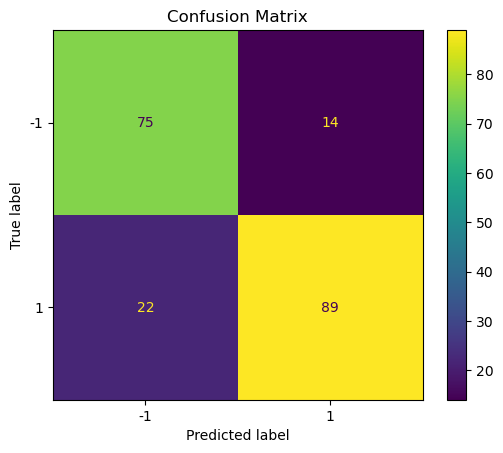

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_sgdmini_pred = classifier.predict(Xtest)
ConfusionMatrixDisplay.from_predictions(Ytest, y_sgdmini_pred)
plt.title("Confusion Matrix")
plt.show()